In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
file_1 = open('file_1.txt','w')

In [4]:
# 1. Найти "id" топ 10 самых дорогих квартир
train_df = pd.read_csv('./data/HW_train_main_data.csv')

In [5]:
test_df = pd.read_csv('./data/HW_test_main_data.csv')

In [6]:
test_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area
0,30307,2014-04-20,74,43.0,13.0,14.0,1.0,1996.0,3.0,10.0,2.0,60
1,87380,2015-01-17,29,NaN,6.0,17.0,1.0,NaN,1.0,1.0,1.0,87
2,12874,2014-07-08,80,NaN,8.0,17.0,1.0,NaN,3.0,1.0,NaN,103
3,57688,2013-01-15,53,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80
4,43433,2012-06-15,36,19.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,117
...,...,...,...,...,...,...,...,...,...,...,...,...
995,28684,2015-04-05,54,NaN,2.0,17.0,1.0,NaN,2.0,1.0,1.0,96
996,65212,2014-05-22,78,45.0,5.0,10.0,1.0,1995.0,3.0,10.0,2.0,60
997,11218,2014-12-18,2,1.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,54
998,57238,2013-06-09,55,33.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9


In [7]:
list_a = train_df.sort_values('price',ascending=False).head(10).id.values.tolist()

In [8]:
','.join(str(i) for i in list_a)

'85073,14154,88100,78059,91175,45584,95572,63901,92747,40136'

In [9]:
file_1.write(str(list_a) + '\n')

71

In [10]:
# 2. Построить зависимость средней стоимости квартиры от года и месяца продаж
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['month_year'] = train_df['month'].astype(str) + '_' + train_df['year'].astype(str)

In [11]:
aggr_1 = train_df.sort_values(['year','month']).groupby(['year','month']).price.mean().reset_index()

In [12]:
aggr_1['year_month'] = aggr_1['year'].astype(str) +'_'+ aggr_1['month'].astype(str)

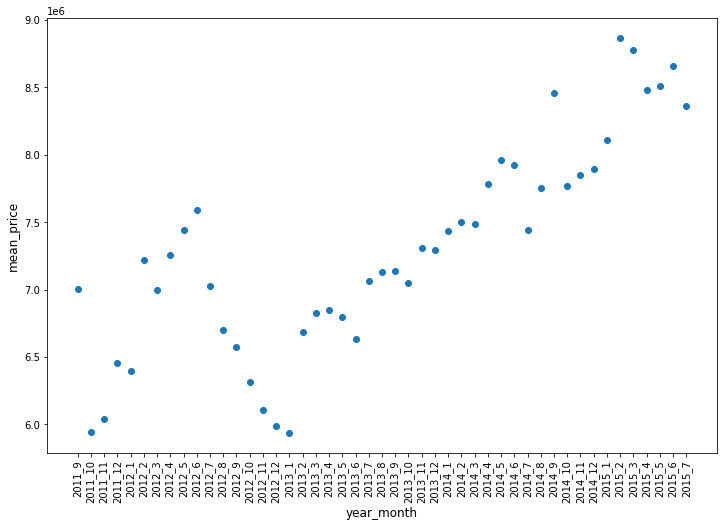

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(x='year_month', y='price', data=aggr_1)
plt.ylabel('mean_price', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
# 3 Для каждой пары месяц-год  найдите индексы самых дорогих квартир, сохраните отдельный список

In [15]:
train_df.groupby(['year', 'month'])['price'].max().reset_index()\
.merge(train_df, how='left', on=['year', 'month','price'])\
[['year','month', 'price','id']].id.values.tolist()

[93255,
 39837,
 33763,
 42921,
 86122,
 59279,
 84792,
 80442,
 85073,
 53400,
 80358,
 38059,
 35501,
 45584,
 38931,
 18753,
 20881,
 63901,
 78059,
 38846,
 14154,
 84443,
 42092,
 59134,
 60348,
 85298,
 18085,
 20432,
 55606,
 98631,
 68847,
 43686,
 58882,
 91175,
 49814,
 73610,
 34194,
 75296,
 56862,
 95044,
 53674,
 95572,
 88100,
 67613,
 40136,
 72354,
 45373]

In [16]:
file_1.write(str(train_df.groupby(['year', 'month'])['price'].max().reset_index()\
.merge(train_df, how='left', on=['year', 'month','price'])\
[['year','month', 'price','id']].id.values.tolist())+ '\n')

330

In [17]:
#idmax_per_yearmonth = train_df.groupby(['year', 'month'])['price'].idxmax().values

In [18]:
# 4 Постройте boxplot для цены для пар месяц-год 

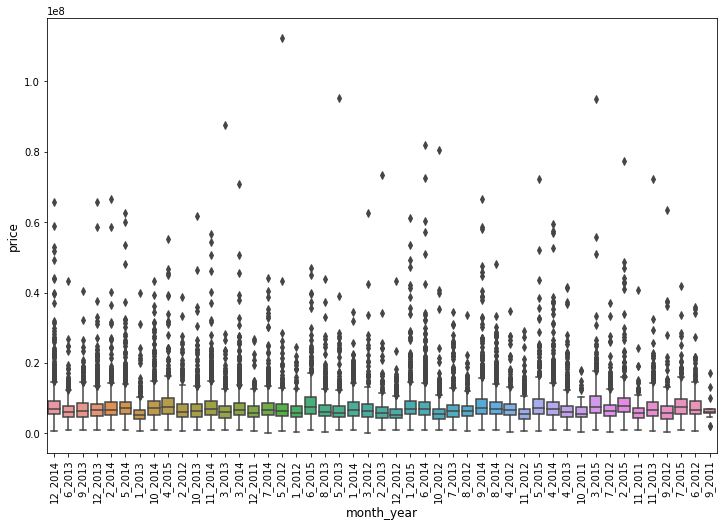

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month_year', y='price', data=train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('month_year', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
# 5 Найдите "id" 5 самых больших квартир
big_sq_ind = train_df.sort_values('full_sq',ascending=False).head(5).id.values
file_1.write(str(big_sq_ind.tolist())+ '\n')

36

In [21]:
# 6 Посчитайте кол-во пропусков в life_sq, сохраните это число, и отдельно "id" всех строк с пропусками в поле life_sq
life_sq_null_sum = train_df.life_sq.isnull().sum()
life_sq_ids = train_df[train_df.life_sq.isnull()]['id'].values

In [22]:
file_1.write(str(life_sq_ids.tolist())+ '\n')

42456

In [23]:
# 7 Предложите вариант как можно заполнить пропуски в life_sq

In [24]:
# как вариант можно построить KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
clf = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
grcv = GridSearchCV(clf, params, n_jobs=-1)
grcv.fit(train_df[~train_df.life_sq.isnull()].full_sq.values.reshape(-1,1)
         , train_df[~train_df.life_sq.isnull()].life_sq.values.reshape(-1,1))
no_life_sq = grcv.predict(train_df[train_df.life_sq.isnull()].full_sq.values.reshape(-1,1))

In [25]:
grcv.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [26]:
train_df['pred_life_sq'] = np.NaN
train_df.loc[train_df.life_sq.isnull(),'pred_life_sq'] = list(no_life_sq.reshape(1,-1)[0])

In [27]:
# 8 Сохраните коффициент корреляции Пирсона между price и full_sq, и price и *life_sq*
# где *life_sq* - скорректированное значение life_sq после заполнения пропусков
print(np.corrcoef(train_df.full_sq,train_df.price)[0][1])
print(np.corrcoef(train_df.price, train_df.life_sq.combine_first(train_df.pred_life_sq))[0][1])

0.3371130874205788
0.4185643954042566


In [28]:
file_1.write(str([np.corrcoef(train_df.full_sq,train_df.price)[0][1], np.corrcoef(train_df.price, train_df.life_sq.combine_first(train_df.pred_life_sq))[0][1]])+ '\n')

41

In [29]:
file_1.close()

In [30]:
# 8 Добавьте дополнительные данные. Заполните пропуски в данных, сгенерируйте новые данные из существующих
# 9 Создайте модель для предсказания цен квартир
# 10 Посмотрите на важность признаков 
# 11 Создайте предсказание для тестовой выборки
# 12 Подготовьте 2 итоговых файла

### Первый итоговый файл должен выглядить следующим образом: 
"id" топ 10 самых дорогих квартир
индексы самых дорогих квартир, сохраните отдельный список
"id" 5 самых больших квартир
коффициент корреляции Пирсона между price и full_sq, и price и *life_sq*

### Второй итоговый файл должен выглядить следующим образом: 
id, predicted_price для тестовых данных

In [31]:
# Prepare data
# train_df = pd.read_csv('./data/HW_train_main_data.csv')
add_df = pd.read_csv('./data/HW_train_additional_data.csv')
add_test_df = pd.read_csv('./data/HW_test_additional_data.csv')
test_df = pd.read_csv('./data/HW_test_main_data.csv')

In [32]:
train_df = train_df[train_df['full_sq'] > 0]

In [33]:
train_df = train_df.merge(add_df, how= 'left', on='id')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_no_life_sq = grcv.predict(test_df[test_df.life_sq.isnull()].full_sq.values.reshape(-1,1))
test_df['pred_life_sq'] = np.NaN
test_df.loc[test_df.life_sq.isnull(),'pred_life_sq'] = list(test_no_life_sq.reshape(1,-1)[0])
test_df = test_df.merge(add_test_df,how='left',on='id')

In [34]:
train_df = train_df.fillna(-20)
test_df = test_df.fillna(-20)

In [35]:
# get week of the year
train_df['week_of_year'] = train_df.timestamp.dt.weekofyear
test_df['week_of_year'] = test_df.timestamp.dt.weekofyear

# get day of week
train_df['day_of_week'] = train_df.timestamp.dt.weekday
test_df['day_of_week'] = test_df.timestamp.dt.weekday

train_df['timestamp_int'] = train_df.timestamp.astype(int)
test_df['timestamp_int'] = test_df.timestamp.astype(int)

/Users/snv23/PycharmProjects/Karpov_solutions/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/Users/snv23/PycharmProjects/Karpov_solutions/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# get ratio of squares
train_df["ratio_life_dash_full_sq"] = train_df["life_sq"] / train_df["full_sq"]
train_df["ration_kitchen_dash_full_sq"] = train_df["kitch_sq"] / train_df["full_sq"]
test_df["ratio_life_dash_full_sq"] = test_df["life_sq"] / test_df["full_sq"]
test_df["ration_kitchen_dash_full_sq"] = test_df["kitch_sq"] / test_df["full_sq"]

# age of building
train_df['age'] = train_df["build_year"] - train_df['year']
test_df['age'] = test_df["build_year"] - test_df['year']

# difference between full area and living area
train_df['some_extra_sqr_1'] = train_df["full_sq"] - train_df["life_sq"]
test_df['some_extra_sqr_1'] = test_df["full_sq"] - test_df["life_sq"]
train_df['some_extra_sqr_2'] = train_df["full_sq"] - train_df.life_sq.combine_first(train_df.pred_life_sq)
test_df['some_extra_sqr_2'] = test_df["full_sq"] - test_df.life_sq.combine_first(test_df.pred_life_sq)

In [37]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [38]:
xgb_params_2 = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [39]:
xgb_params_3 = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [40]:
xgb_train = xgb.DMatrix(train_df.drop(['timestamp','price','month_year'], axis=1)
                        , train_df['price']
                        , feature_names = train_df.drop(['timestamp','price','month_year'], axis=1).columns
                        , enable_categorical=True)
xgb_test = xgb.DMatrix(test_df.drop(['timestamp'], axis=1)
                        , feature_names = test_df.drop(['timestamp'], axis=1).columns
                        , enable_categorical=True)

In [41]:
model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[20:14:10] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [42]:
model_2 = xgb.train(params = xgb_params_2
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[20:15:19] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [43]:
model_3 = xgb.train(params = xgb_params_3
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[20:15:53] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [44]:
test_df['pred_price'] = model.predict(xgb_test)

In [45]:
test_df['pred_price_2'] = model_2.predict(xgb_test)

In [46]:
test_df['pred_price_3'] = model_3.predict(xgb_test)

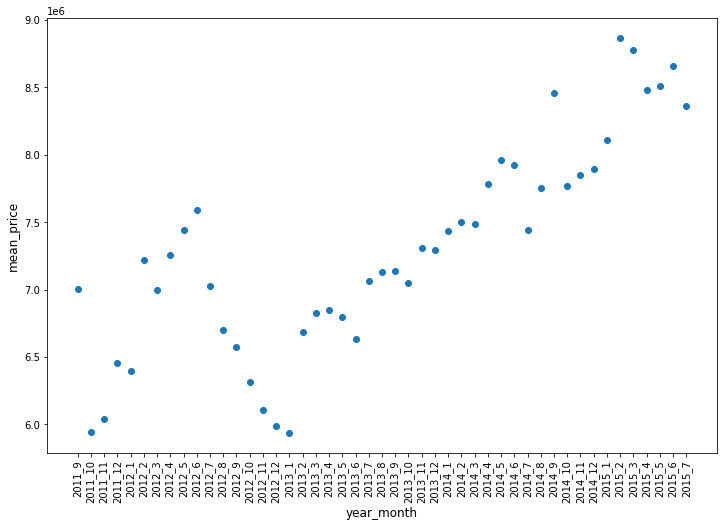

In [47]:
# Посмотрим еще раз на изменение средних 
plt.figure(figsize=(12,8))
plt.scatter(x='year_month', y='price', data=aggr_1)
plt.ylabel('mean_price', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
# Поделим время на периоды
# 9 периодов взято с потолка однако определение границ периодов шло на основе средних на графике
test_df['period_flag'] = 0
#1
test_df.loc[test_df['timestamp'] < pd.to_datetime('2012-01-01'), 'period_flag'] = 1

#2
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2012-01-01')) &
               (test_df['timestamp'] <pd.to_datetime('2012-06-01')), 'period_flag'] = 2

#1
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2012-06-01')) &
               (test_df['timestamp'] <pd.to_datetime('2013-03-01')), 'period_flag'] = 3

#1
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2013-03-01')) &
               (test_df['timestamp'] <pd.to_datetime('2013-08-01')), 'period_flag'] = 4 

#2
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2013-08-01')) &
               (test_df['timestamp'] <pd.to_datetime('2013-12-01')), 'period_flag'] = 5 
#1-2
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2013-12-01')) &
               (test_df['timestamp'] <pd.to_datetime('2014-05-01')), 'period_flag'] = 6 

#2
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2014-05-01')) &
               (test_df['timestamp'] <pd.to_datetime('2015-03-01')), 'period_flag'] = 7 

#1
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2015-03-01')), 'period_flag'] = 8


In [49]:
# Проставим для опеределенных периодов свои predictions
# Выбор предиктов можно осуществлять различными способами например с помощью метамодели
def good_prediction(row):
    pred = 0
    map_dict = {
        1: row.pred_price,
        2: row.pred_price_2,
        3: row.pred_price_2,
        4: row.pred_price, 
        5: row.pred_price_2,
        6: row.pred_price_2,
        7: (row.pred_price +row.pred_price_2)/2,
        8: (row.pred_price +row.pred_price_2)/2
               }
    pred = map_dict[row.period_flag]
    return pred

In [50]:
test_df['good_pred'] = test_df.apply(lambda x: good_prediction(x), axis=1)

In [51]:
test_df[['id', 'good_pred']].rename(columns={'good_pred': 'predicted_price'}).to_csv('good_pred.csv', index=False)

In [53]:
# Максимум, который можно выбить за счет грамотного выбора предсказаний из 2-х моделей 
mean_squared_error(answers.price, answers.ideal_price, squared=False)

2207293.210634896